# FANDANGO- RATING MISMATCH ANALYSIS PROJECT

## Oveview

When u decide to go out to watch a movie with your friends and family ,can you trust online reviews and ratings? Especially when they make money by selling movie tickets by increasing ratings.Do they rate movie higher than they should be rated? 

## Goal

To determine if fandango's rating in 2015 was biased towards rating to sell more tickets

## Part One: Understanding the Background and Data

### Importing libraries

In [1]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

## Part Two: Exploring Fandango Scores vs True User Ratings

### Read fandango_scrape.csv File

In [2]:
fandango= pd.read_csv("fandango_scrape.csv")

### Explore DataFrame Properties and Head

In [3]:
fandango.head()

,FILM,STARS,RATING,VOTES
0,Fifty Shades of Grey (2015),4.0,3.9,34846
1,Jurassic World (2015),4.5,4.5,34390
2,American Sniper (2015),5.0,4.8,34085
3,Furious 7 (2015),5.0,4.8,33538
4,Inside Out (2015),4.5,4.5,15749


In [4]:
fandango.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   FILM    504 non-null    object 
 1   STARS   504 non-null    float64
 2   RATING  504 non-null    float64
 3   VOTES   504 non-null    int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 15.9+ KB


In [5]:
fandango.describe()

,STARS,RATING,VOTES
count,504.000000,504.000000,504.000000
mean,3.558532,3.375794,1147.863095
std,1.563133,1.491223,3830.583136
min,0.000000,0.000000,0.000000
25%,3.500000,3.100000,3.000000
50%,4.000000,3.800000,18.500000
75%,4.500000,4.300000,189.750000
max,5.000000,5.000000,34846.000000


In [6]:
fandango.dtypes

FILM       object
STARS     float64
RATING    float64
VOTES       int64
dtype: object

In [7]:
fandango_corr=fandango.drop(columns=['FILM'])

In [8]:
fandango_corr.corr()

,STARS,RATING,VOTES
STARS,1.000000,0.994696,0.164218
RATING,0.994696,1.000000,0.163764
VOTES,0.164218,0.163764,1.000000


### Let's explore the relationship between popularity of a film and its ratings using scatterplot.

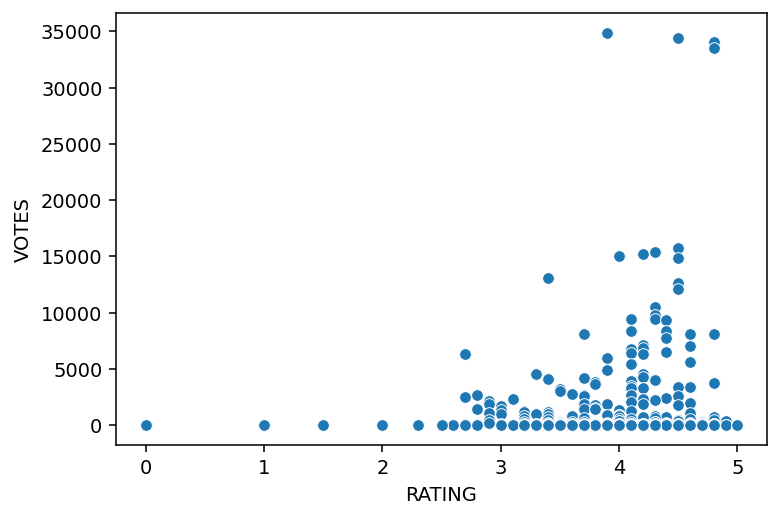

In [9]:
plt.figure(figsize=(6,4),dpi=140)
sns.scatterplot(data=fandango,y="VOTES",x="RATING")
plt.show()

### Creating a new column that is able to strip the year from TITLE string.

In [10]:
fandango['YEAR']=fandango['FILM'].apply(lambda title: title.split('(')[-1].replace(')',''))

In [11]:
fandango

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015
...,...,...,...,...,...
499,Valiyavan (2015),0.0,0.0,0,2015
500,WWE SummerSlam 2015 (2015),0.0,0.0,0,2015
501,Yagavarayinum Naa Kaakka (2015),0.0,0.0,0,2015
502,"Yesterday, Today and Tomorrow (1964)",0.0,0.0,0,1964


### How many movies are there in fandango dataframe per year?

In [12]:
fandango['YEAR'].value_counts()

YEAR
2015    478
2014     23
2016      1
1964      1
2012      1
Name: count, dtype: int64

### Visualizing the count of movies per year using countplot.

<Axes: xlabel='YEAR', ylabel='count'>

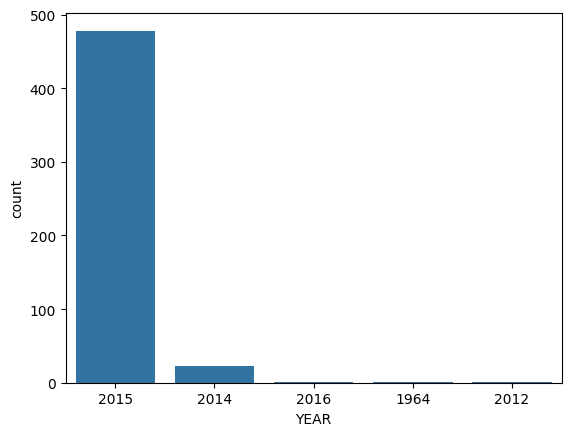

In [13]:
sns.countplot(data=fandango,x='YEAR')

### 10 Movies with the highest number of votes.

In [14]:
fandango.nlargest(10,'VOTES')

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015
5,The Hobbit: The Battle of the Five Armies (2014),4.5,4.3,15337,2014
6,Kingsman: The Secret Service (2015),4.5,4.2,15205,2015
7,Minions (2015),4.0,4.0,14998,2015
8,Avengers: Age of Ultron (2015),5.0,4.5,14846,2015
9,Into the Woods (2014),3.5,3.4,13055,2014


### Movies which have zero votes.

In [15]:
no_votes=fandango["VOTES"]==0

In [16]:
no_votes.sum()

69

### Creating a dataframe of reviewed movies by removing those who have zero votes.

In [17]:
fan_review=fandango[fandango["VOTES"]>0]

### Creating a KDE plot that displays the distribution of ratings that are displayed(STARS) vs the true ratings that was from votes(RATING).

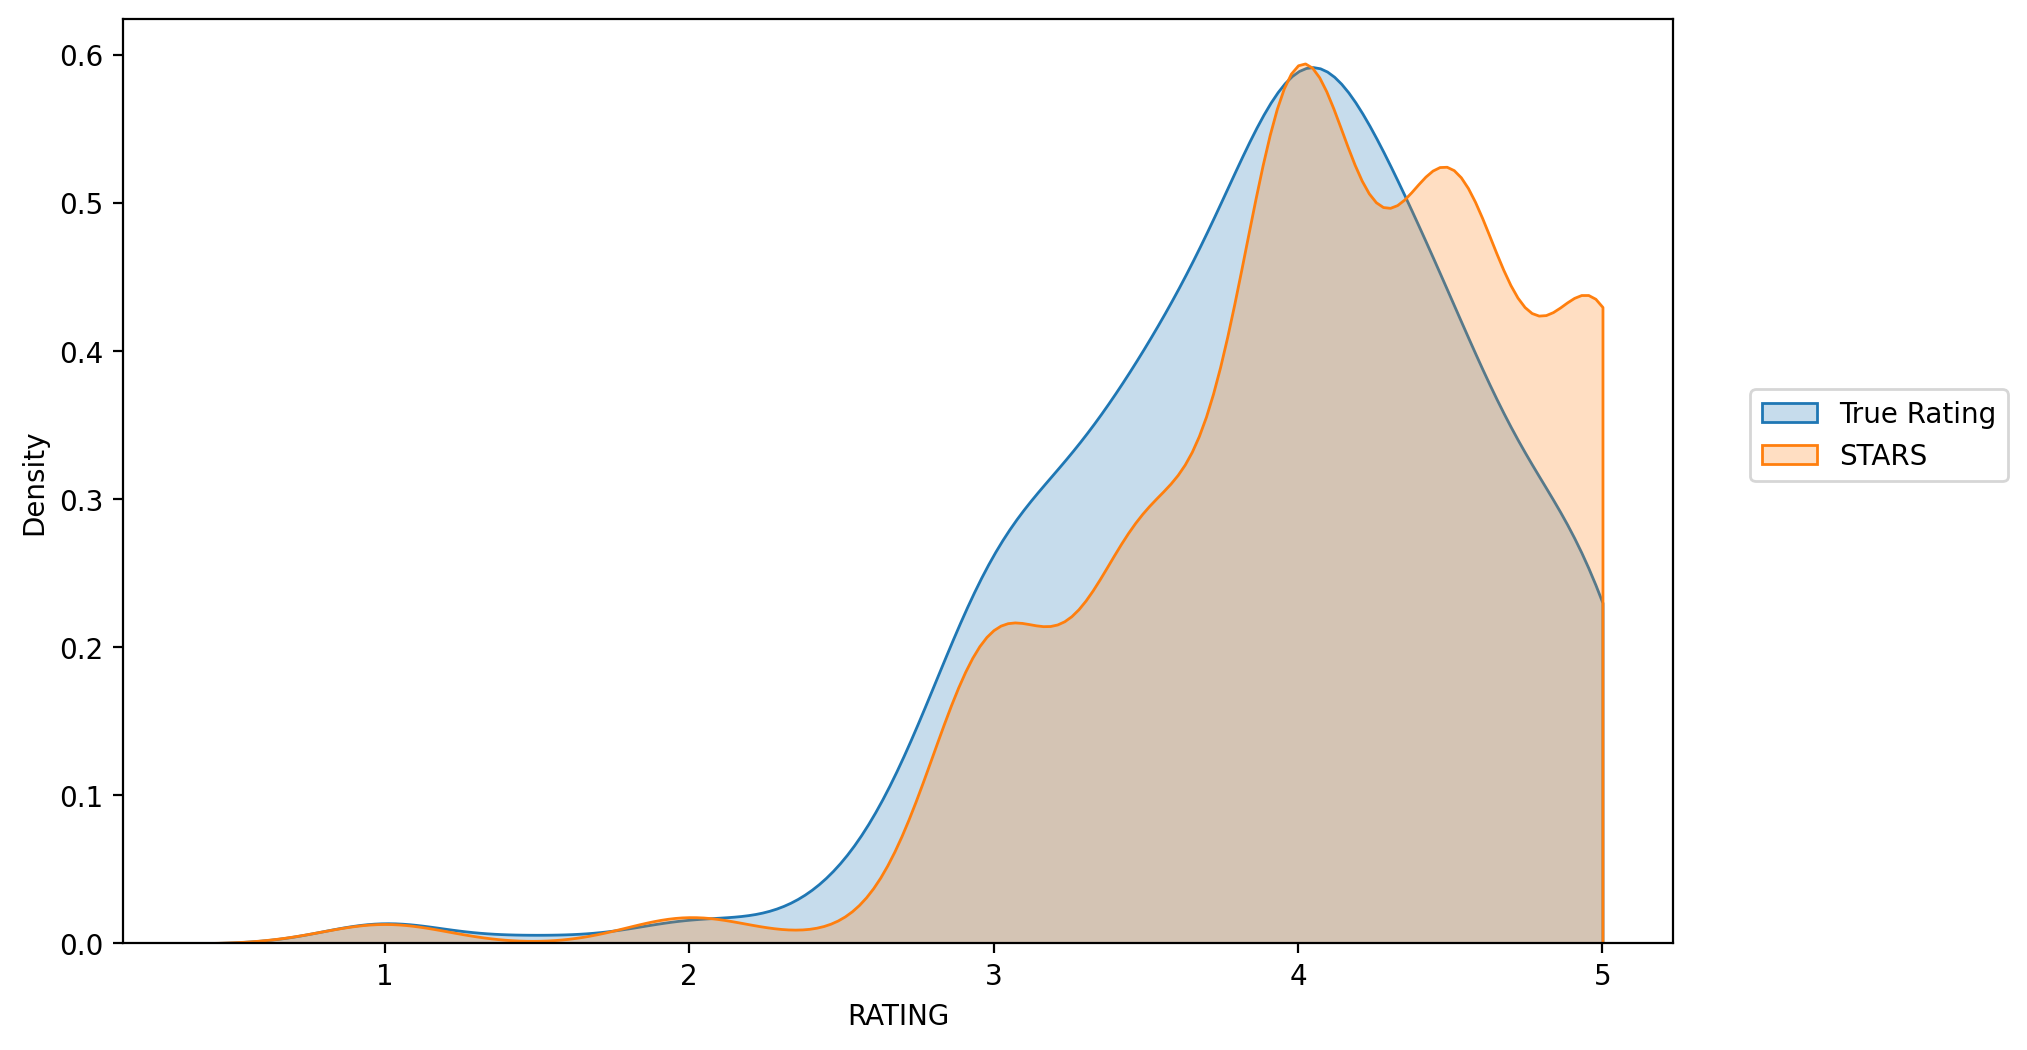

In [18]:
plt.figure(figsize=(10,6),dpi=200)
sns.kdeplot(data=fan_review,x='RATING',clip=[0,5],fill=True,label='True Rating')
sns.kdeplot(data=fan_review,x='STARS',clip=[0,5],fill=True,label='STARS')
plt.legend(loc=(1.05,0.5))

### Let's now actually quantify the mismatch. Creating a new column of the different between STARS vs true RATING. Calculating differnce with STARS-RATING and rounding them

In [19]:
fan_review['DIFF_STAR']= fan_review['STARS']- fan_review['RATING']

C:\Users\Shubham-Tejas\AppData\Local\Temp\ipykernel_22272\2679949407.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fan_review['DIFF_STAR']= fan_review['STARS']- fan_review['RATING']


In [20]:
fan_review['DIFF_STAR']=fan_review['DIFF_STAR'].round(2)

C:\Users\Shubham-Tejas\AppData\Local\Temp\ipykernel_22272\4227706450.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fan_review['DIFF_STAR']=fan_review['DIFF_STAR'].round(2)


In [21]:
fan_review

,FILM,STARS,RATING,VOTES,YEAR,DIFF_STAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,0.1
1,Jurassic World (2015),4.5,4.5,34390,2015,0.0
2,American Sniper (2015),5.0,4.8,34085,2015,0.2
3,Furious 7 (2015),5.0,4.8,33538,2015,0.2
4,Inside Out (2015),4.5,4.5,15749,2015,0.0
...,...,...,...,...,...,...
430,That Sugar Film (2015),5.0,5.0,1,2015,0.0
431,The Intern (2015),5.0,5.0,1,2015,0.0
432,The Park Bench (2015),5.0,5.0,1,2015,0.0
433,The Wanted 18 (2015),5.0,5.0,1,2015,0.0


### Creating a countplot to display the number of times a certain differnce occurs.

C:\Users\Shubham-Tejas\AppData\Local\Temp\ipykernel_22272\1491519387.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=fan_review,x='DIFF_STAR',palette='magma')


<Axes: xlabel='DIFF_STAR', ylabel='count'>

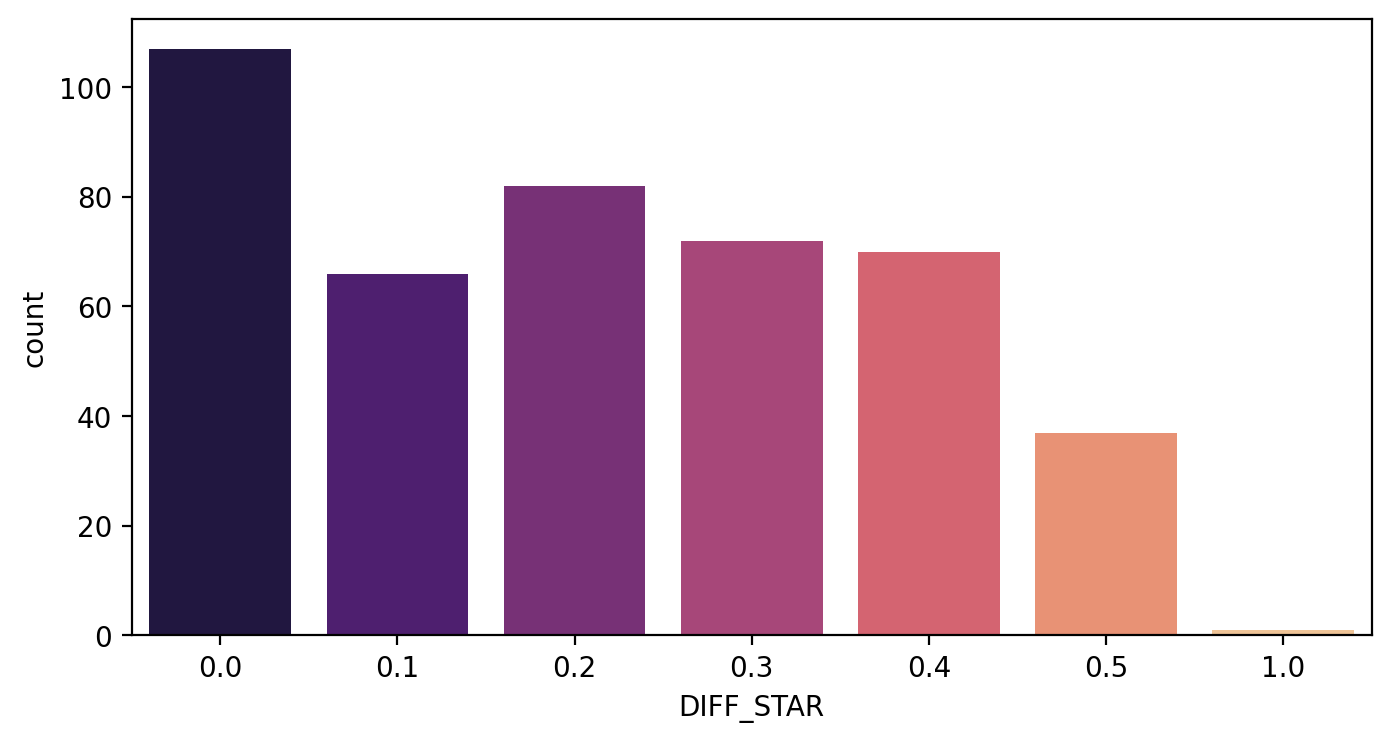

In [22]:
plt.figure(figsize=(8,4),dpi=200)
sns.countplot(data=fan_review,x='DIFF_STAR',palette='magma')

### From the plot we can see that one movie was displayingover a 1 star differnce than its true rating.So the movie that have close to 1 differntial.

In [23]:
fan_review[fan_review['DIFF_STAR']==1]

,FILM,STARS,RATING,VOTES,YEAR,DIFF_STAR
381,Turbo Kid (2015),5.0,4.0,2,2015,1.0


## Comparison of Fandango Rating with Other Sites

### Let's now compare scores from fandango to other movie sites and see how they compare.

### Read all_sites_scores.csv file

In [24]:
all_sites= pd.read_csv("all_sites_scores.csv")

### Explore the DataFrame columns,info and description.

In [25]:
all_sites.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709
2,Ant-Man (2015),80,90,64,8.1,7.8,627,103660
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,88,19560


In [26]:
all_sites.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   FILM                        146 non-null    object 
 1   RottenTomatoes              146 non-null    int64  
 2   RottenTomatoes_User         146 non-null    int64  
 3   Metacritic                  146 non-null    int64  
 4   Metacritic_User             146 non-null    float64
 5   IMDB                        146 non-null    float64
 6   Metacritic_user_vote_count  146 non-null    int64  
 7   IMDB_user_vote_count        146 non-null    int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 9.3+ KB


In [27]:
all_sites.describe()

,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
count,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000
mean,60.849315,63.876712,58.808219,6.519178,6.736986,185.705479,42846.205479
std,30.168799,20.024430,19.517389,1.510712,0.958736,316.606515,67406.509171
min,5.000000,20.000000,13.000000,2.400000,4.000000,4.000000,243.000000
25%,31.250000,50.000000,43.500000,5.700000,6.300000,33.250000,5627.000000
50%,63.500000,66.500000,59.000000,6.850000,6.900000,72.500000,19103.000000
75%,89.000000,81.000000,75.000000,7.500000,7.400000,168.500000,45185.750000
max,100.000000,94.000000,94.000000,9.600000,8.600000,2375.000000,334164.000000


## Rotten Tomatoes

### Let's first look at Rotten Tomatoes. RT has two set of reviews, their critic review and user review. Creating a scatterplot to explain their relationship.

(0.0, 100.0)

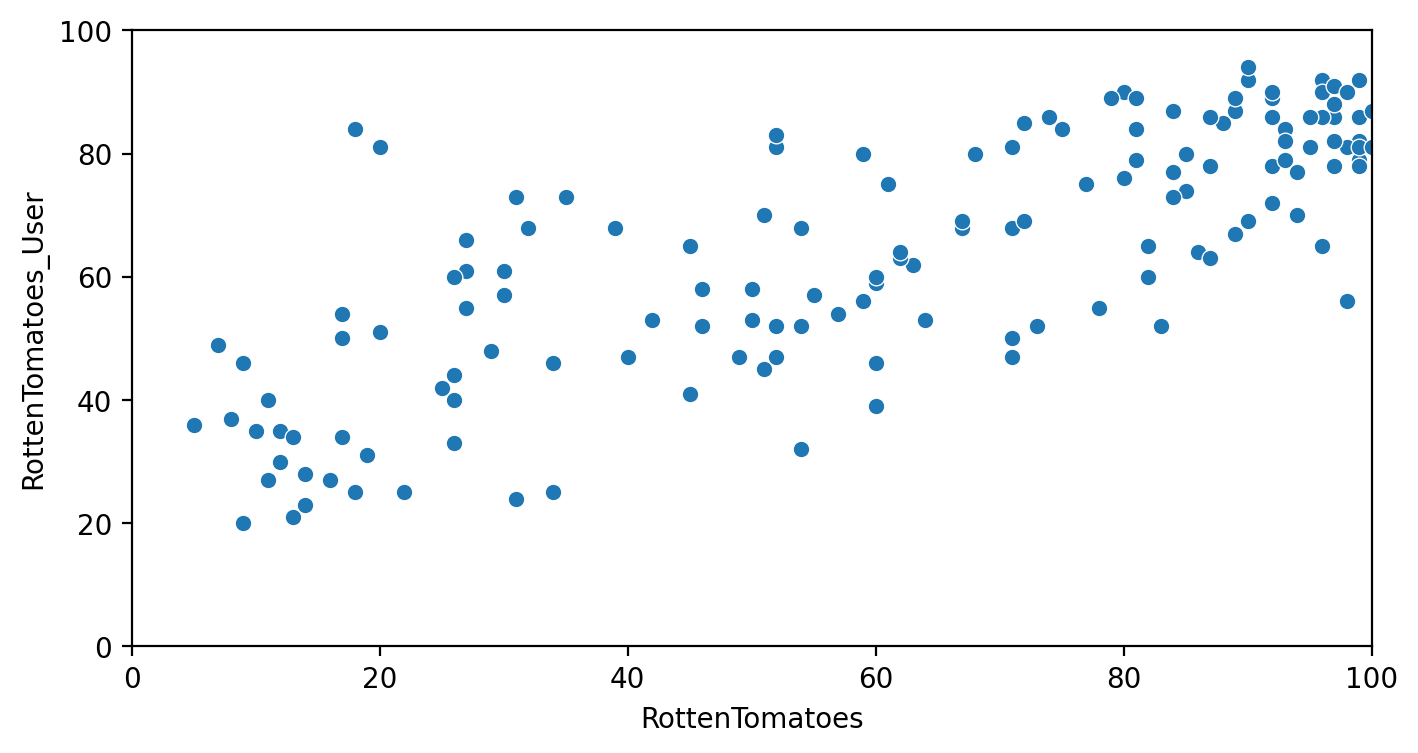

In [28]:
plt.figure(figsize=(8,4),dpi=200)
sns.scatterplot(data=all_sites,x="RottenTomatoes",y="RottenTomatoes_User")
plt.xlim(0,100)
plt.ylim(0,100)

### Creating a new column based off the differnce between critics ratings and user ratings for Rotten Tomatoes. By using RottenTomatoes-RottenTimatoes_User.

In [29]:
all_sites['Rotten_diff']=all_sites['RottenTomatoes']- all_sites['RottenTomatoes_User']

### Let's quantify the differnce by comparing the critics rating and the RT user rating. We will calculate this with RottenTomatoes-RottenTomatoes_User.Rotten_diff here is critic-user score. So value 0 depicts agreement between the critics and user. Larger positive values depicts critics rated much higher. While the opposite depicts user rated much higher.

### Calculating Mean Absolute Value Difference between RT scores and RT User scores.

In [30]:
all_sites['Rotten_diff'].apply(abs).mean()

15.095890410958905

### Plotting the distribution of the difference between RT critic score and RT user score. To avoid negative value in distribution plot.

<Axes: xlabel='Rotten_diff', ylabel='Count'>

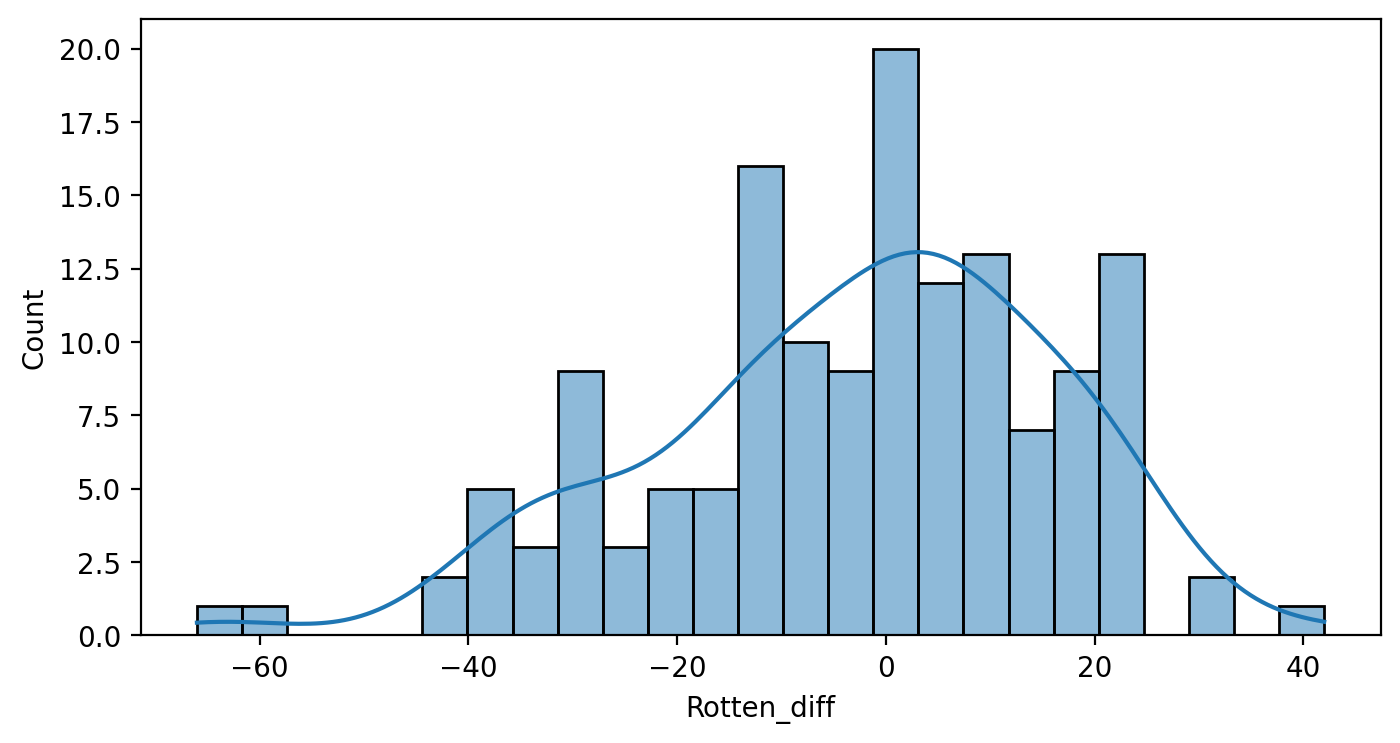

In [31]:
plt.figure(figsize=(8,4),dpi=200)
sns.histplot(data=all_sites,x='Rotten_diff',kde=True,bins=25)

### Now showing the distribution of absolute value differnce between Critics and Users in Rotten Tomatoes.

<Axes: xlabel='Rotten_diff', ylabel='Count'>

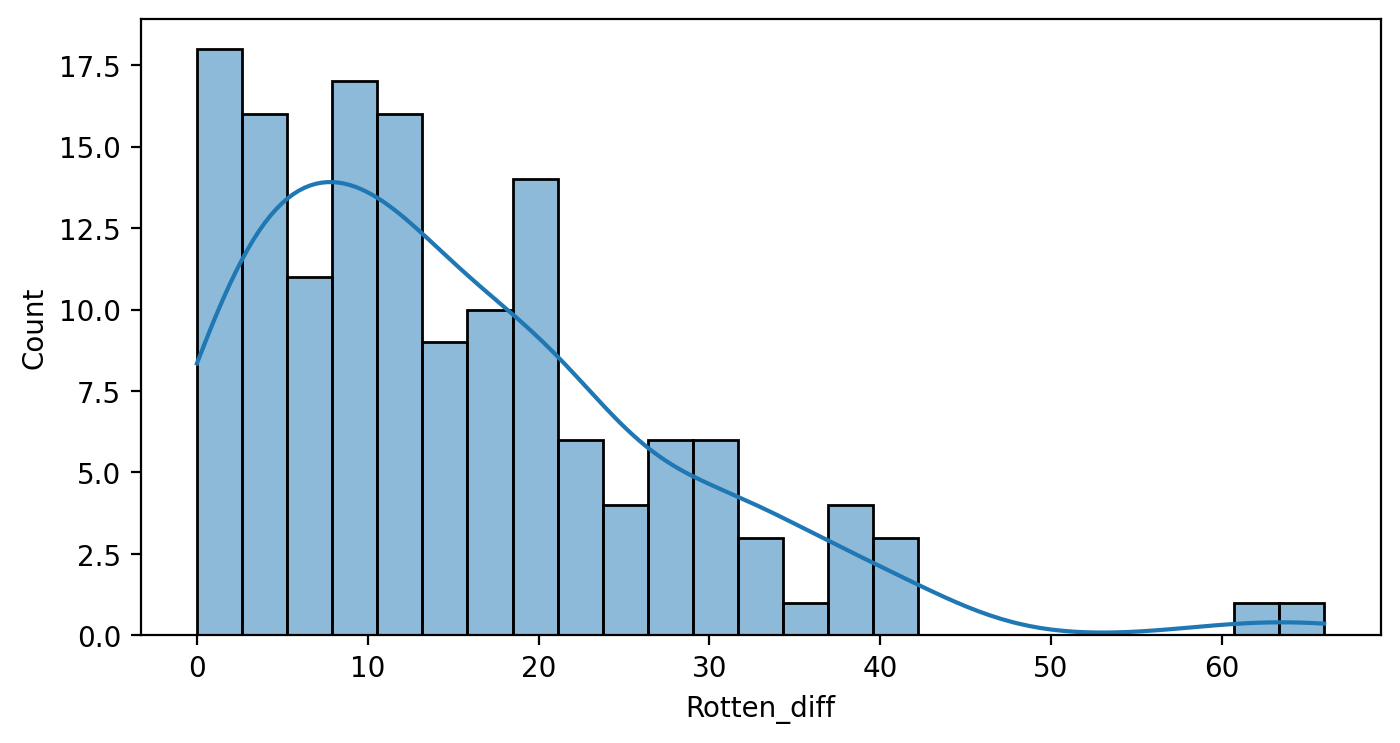

In [32]:
plt.figure(figsize=(8,4),dpi=200)
sns.histplot(x=all_sites['Rotten_diff'].apply(abs),kde=True,bins=25)

### Lets's find out which movies are causing the largest differnces. First,show the top 5 movies with the largest negative differnce between users and RT critics. Since we calculated the differnce as Critics Rating-Users Rating, then large negative value imply the user rated the movie much higher on average then critics did.

### The top 5 movies user rated higher than critics on average are so we are looking for highest negative value as Critics-User.Basically it shows what user like but critics hate.

In [33]:
all_sites.nsmallest(5,'Rotten_diff')

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_diff
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136,-66
85,Little Boy (2015),20,81,30,5.9,7.4,38,5927,-61
105,Hitman: Agent 47 (2015),7,49,28,3.3,5.9,67,4260,-42
134,The Longest Ride (2015),31,73,33,4.8,7.2,49,25214,-42
125,The Wedding Ringer (2015),27,66,35,3.3,6.7,126,37292,-39


### The top 5 movies critics rated higher than users on average are? so we are looking for higherst positive value as Critics-User. Basically it shows what critics like but users hate.

In [34]:
all_sites.nlargest(5,'Rotten_diff')

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_diff
69,Mr. Turner (2014),98,56,94,6.6,6.9,98,13296,42
112,It Follows (2015),96,65,83,7.5,6.9,551,64656,31
115,While We're Young (2015),83,52,76,6.7,6.4,65,17647,31
37,Welcome to Me (2015),71,47,67,6.9,5.9,33,8301,24
40,I'll See You In My Dreams (2015),94,70,75,6.9,6.9,14,1151,24


## MetaCritic

### Now let's take quick look on MetaCritic rating.It also shows an average user rating vs the official displayed rating.

### Displaying a scatterplot of MetaCritic rating vs MetaCritic User rating.

(0.0, 10.0)

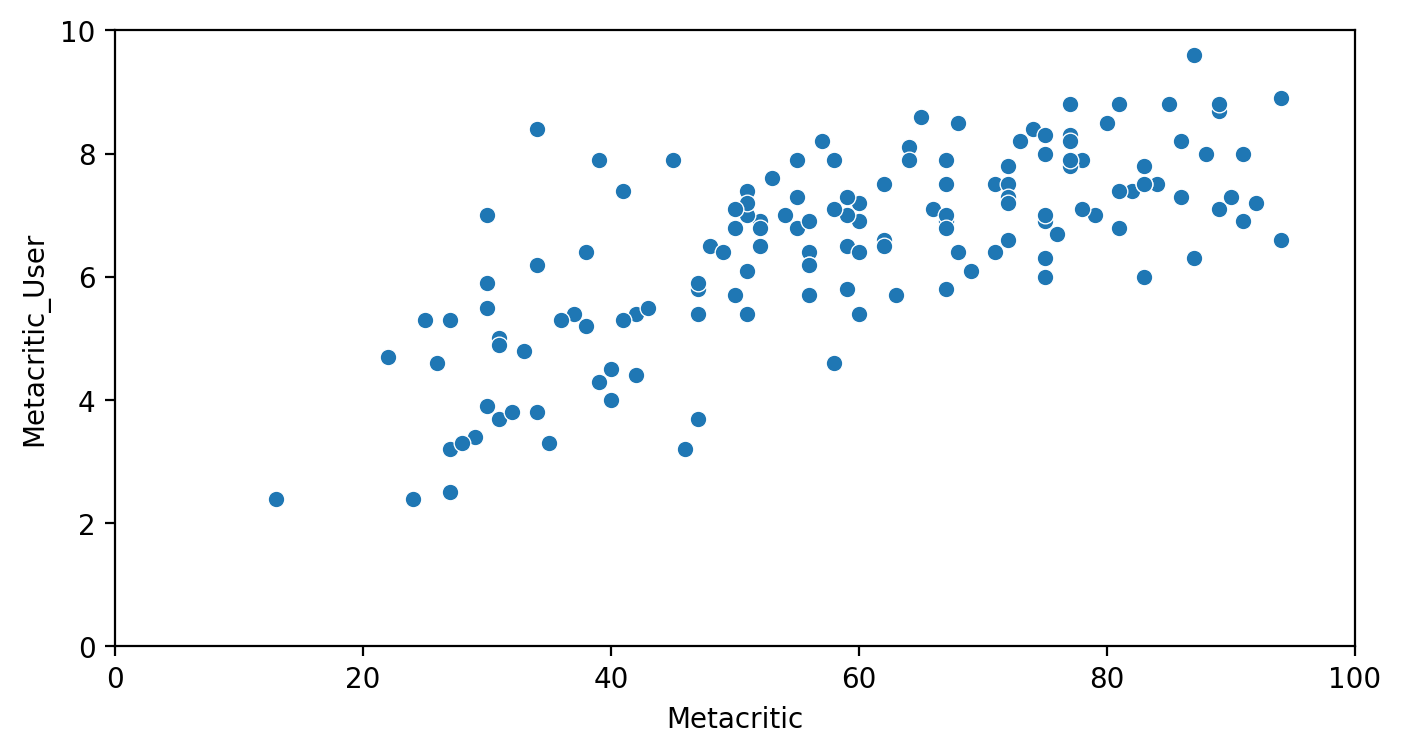

In [35]:
plt.figure(figsize=(8,4),dpi=200)
sns.scatterplot(data=all_sites,x="Metacritic",y="Metacritic_User")
plt.xlim(0,100)
plt.ylim(0,10)

## IMDB

### Finally let's explore IMDB. Notice that both IMDB and MetaCritic have vote counts. Let's analyse the most popular movies.

### Displaying a scatterplot of vote count on MetaCritic vs vote count on IMDB

<Axes: xlabel='Metacritic_user_vote_count', ylabel='IMDB_user_vote_count'>

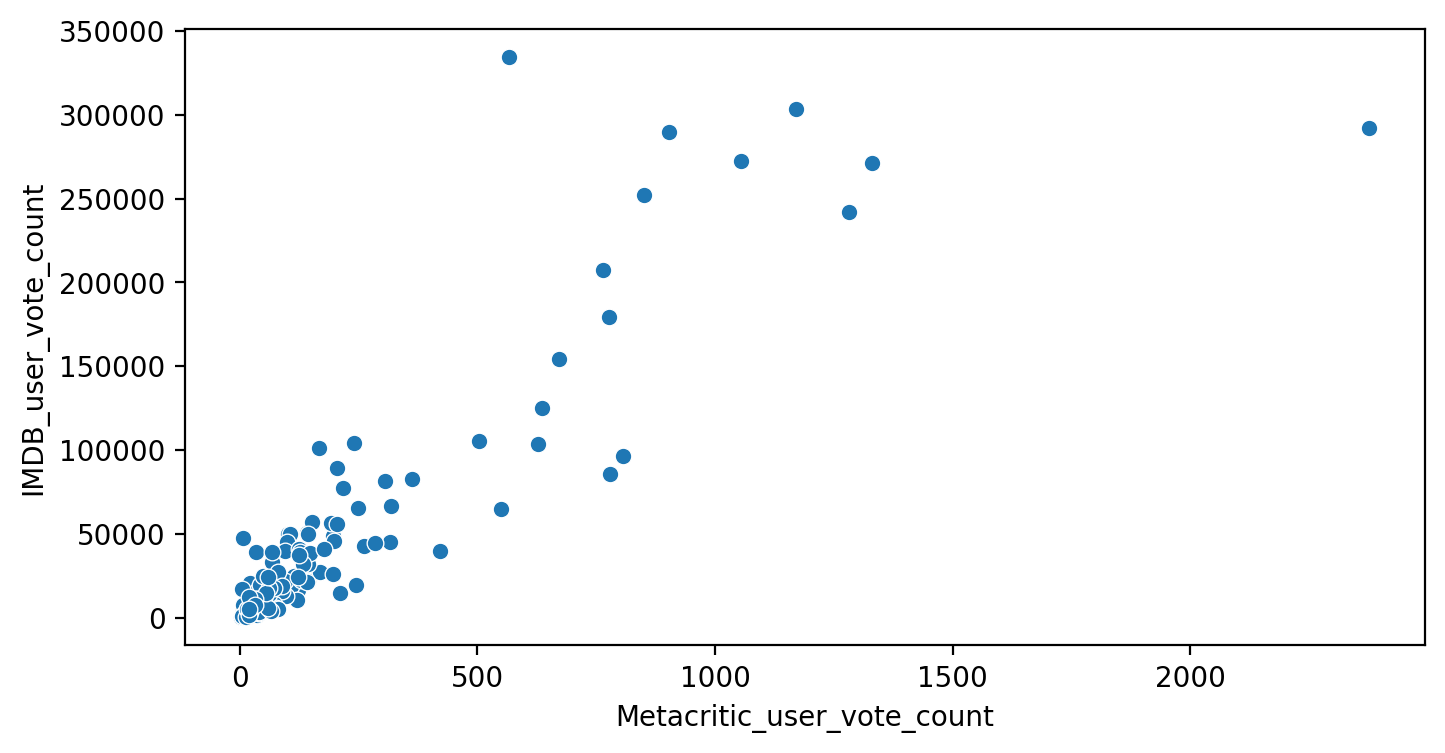

In [36]:
plt.figure(figsize=(8,4),dpi=200)
sns.scatterplot(data=all_sites,x="Metacritic_user_vote_count",y="IMDB_user_vote_count")

### Notice that there are two outliers. The movie with the highest vote count on IMDB only has about 500 MetaCritic user vote count and the other has 300000 user vote count on IMDB and has more than 2000 user vote counts in MetaCritic.


### Movie that has highest IMDB user vote count


In [37]:
all_sites.nlargest(1,"IMDB_user_vote_count")

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_diff
14,The Imitation Game (2014),90,92,73,8.2,8.1,566,334164,-2


### Movie that has highest MetaCritic user vote count

In [38]:
all_sites.nlargest(1,"Metacritic_user_vote_count")

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_diff
88,Mad Max: Fury Road (2015),97,88,89,8.7,8.3,2375,292023,9


## Fandango Score vs All Sites

### Finally let's begin to explore whether or not Fandango displays higher rating just to boost the selling of tickets.

### Combining both fandango table and all sites table. Not every movies in fandango table is present on the all site table as fandango have little or no reviews. We just want to comapare movies that are both in DataFrames so we will do an inner merge based on Film column.


In [39]:
df=pd.merge(fandango,all_sites,on='FILM',how='inner')

In [40]:
df

,FILM,STARS,RATING,VOTES,YEAR,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_diff
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,25,42,46,3.2,4.2,778,179506,-17
1,Jurassic World (2015),4.5,4.5,34390,2015,71,81,59,7.0,7.3,1281,241807,-10
2,American Sniper (2015),5.0,4.8,34085,2015,72,85,72,6.6,7.4,850,251856,-13
3,Furious 7 (2015),5.0,4.8,33538,2015,81,84,67,6.8,7.4,764,207211,-3
4,Inside Out (2015),4.5,4.5,15749,2015,98,90,94,8.9,8.6,807,96252,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,"Kumiko, The Treasure Hunter (2015)",3.5,3.5,41,2015,87,63,68,6.4,6.7,19,5289,24
141,The Diary of a Teenage Girl (2015),4.0,3.6,38,2015,95,81,87,6.3,7.0,18,1107,14
142,The Wrecking Crew (2015),4.5,4.2,38,2015,93,84,67,7.0,7.8,4,732,9
143,Tangerine (2015),4.0,3.9,36,2015,95,86,86,7.3,7.4,14,696,9


## Normalize Columns to fandango Star and Ratings 0-5

### Notice that RT, MetaCritic and IMDB dont use a score between 0-5 stars like fandango does. In order to have fair comparison, we need to normalize the value so they fall to 0-5 stars.

Using for example
100/20=5
10/2=5

In [41]:
df.describe().transpose()['max']

STARS                              5.0
RATING                             4.8
VOTES                          34846.0
RottenTomatoes                   100.0
RottenTomatoes_User               94.0
Metacritic                        94.0
Metacritic_User                    9.6
IMDB                               8.6
Metacritic_user_vote_count      2375.0
IMDB_user_vote_count          334164.0
Rotten_diff                       42.0
Name: max, dtype: float64

In [42]:
import numpy as np
df['RT_norm']=np.round(df['RottenTomatoes']/20,1)
df['RTU_norm']=np.round(df['RottenTomatoes_User']/20,1)

In [43]:
df['Meta_norm']=np.round(df['Metacritic']/20,1)
df['Meta_user_norm']=np.round(df['Metacritic_User']/2,1)

In [44]:
df['IMDB_norm']=np.round(df['IMDB']/2,1)

In [45]:
df.head()

,FILM,STARS,RATING,VOTES,YEAR,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_diff,RT_norm,RTU_norm,Meta_norm,Meta_user_norm,IMDB_norm
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,25,42,46,3.2,4.2,778,179506,-17,1.2,2.1,2.3,1.6,2.1
1,Jurassic World (2015),4.5,4.5,34390,2015,71,81,59,7.0,7.3,1281,241807,-10,3.6,4.0,3.0,3.5,3.6
2,American Sniper (2015),5.0,4.8,34085,2015,72,85,72,6.6,7.4,850,251856,-13,3.6,4.2,3.6,3.3,3.7
3,Furious 7 (2015),5.0,4.8,33538,2015,81,84,67,6.8,7.4,764,207211,-3,4.0,4.2,3.4,3.4,3.7
4,Inside Out (2015),4.5,4.5,15749,2015,98,90,94,8.9,8.6,807,96252,8,4.9,4.5,4.7,4.4,4.3


### Now creating norm_score DataFrame that only contain normalize ratings,including both stars and rating from fandango table.

In [46]:
df.columns

Index(['FILM', 'STARS', 'RATING', 'VOTES', 'YEAR', 'RottenTomatoes',
       'RottenTomatoes_User', 'Metacritic', 'Metacritic_User', 'IMDB',
       'Metacritic_user_vote_count', 'IMDB_user_vote_count', 'Rotten_diff',
       'RT_norm', 'RTU_norm', 'Meta_norm', 'Meta_user_norm', 'IMDB_norm'],
      dtype='object')

In [47]:
norm_scores=df[['FILM', 'STARS','RT_norm', 'RTU_norm', 'Meta_norm', 'Meta_user_norm', 'IMDB_norm']]

In [48]:
norm_scores.head()

,FILM,STARS,RT_norm,RTU_norm,Meta_norm,Meta_user_norm,IMDB_norm
0,Fifty Shades of Grey (2015),4.0,1.2,2.1,2.3,1.6,2.1
1,Jurassic World (2015),4.5,3.6,4.0,3.0,3.5,3.6
2,American Sniper (2015),5.0,3.6,4.2,3.6,3.3,3.7
3,Furious 7 (2015),5.0,4.0,4.2,3.4,3.4,3.7
4,Inside Out (2015),4.5,4.9,4.5,4.7,4.4,4.3


## Comparing Distribution of Scroes across all Sites

## Now getting to know the truth! Does fandango display abnormally high ratings? We already know it that they displayed Rating higher than Stars, but are the ratings themselves higher than average?

### Now creating a plot comparing the distribution of normalised ratings across all sites.

C:\Users\Shubham-Tejas\AppData\Local\Temp\ipykernel_22272\2255904355.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=norm_scores,clip=[0,6],shade=True)


<Axes: ylabel='Density'>

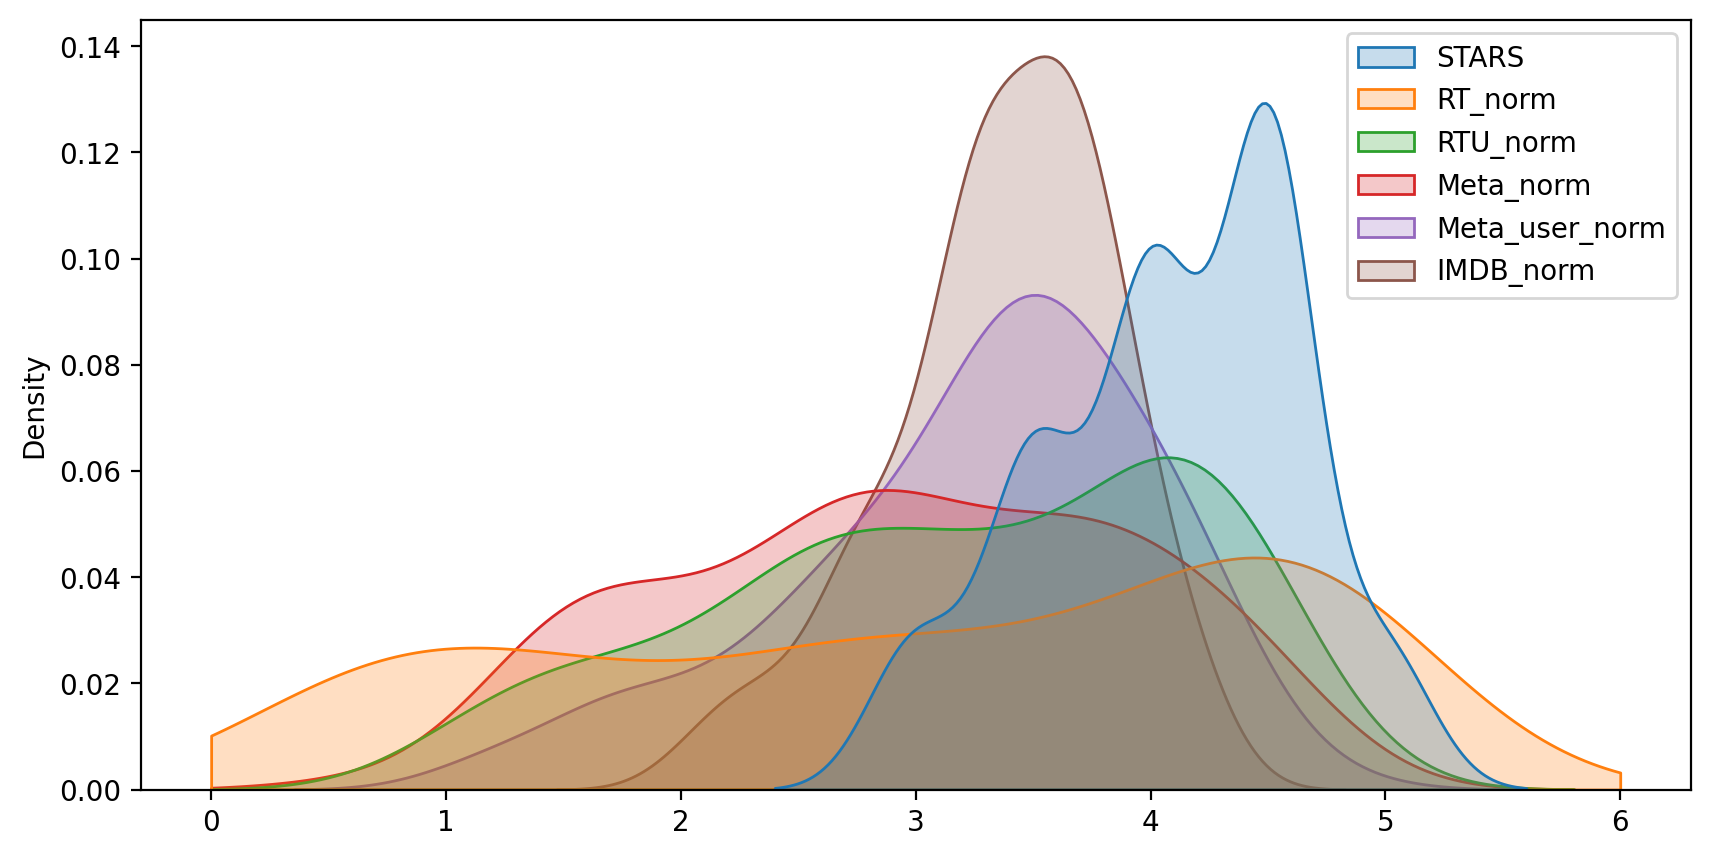

In [49]:
plt.figure(figsize=(10,5),dpi=200)
sns.kdeplot(data=norm_scores,clip=[0,6],shade=True)

### Clearly through all this it shows that fandango has uneven distribution. We can also see that RT critics have most uniform distribution. Let's directly comapre these two RT critic rating against Star displayed by fandango using kde plot.

C:\Users\Shubham-Tejas\AppData\Local\Temp\ipykernel_22272\4134862447.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=norm_scores[['RT_norm','STARS']],clip=[0,6],shade=True,palette='magma')


<Axes: ylabel='Density'>

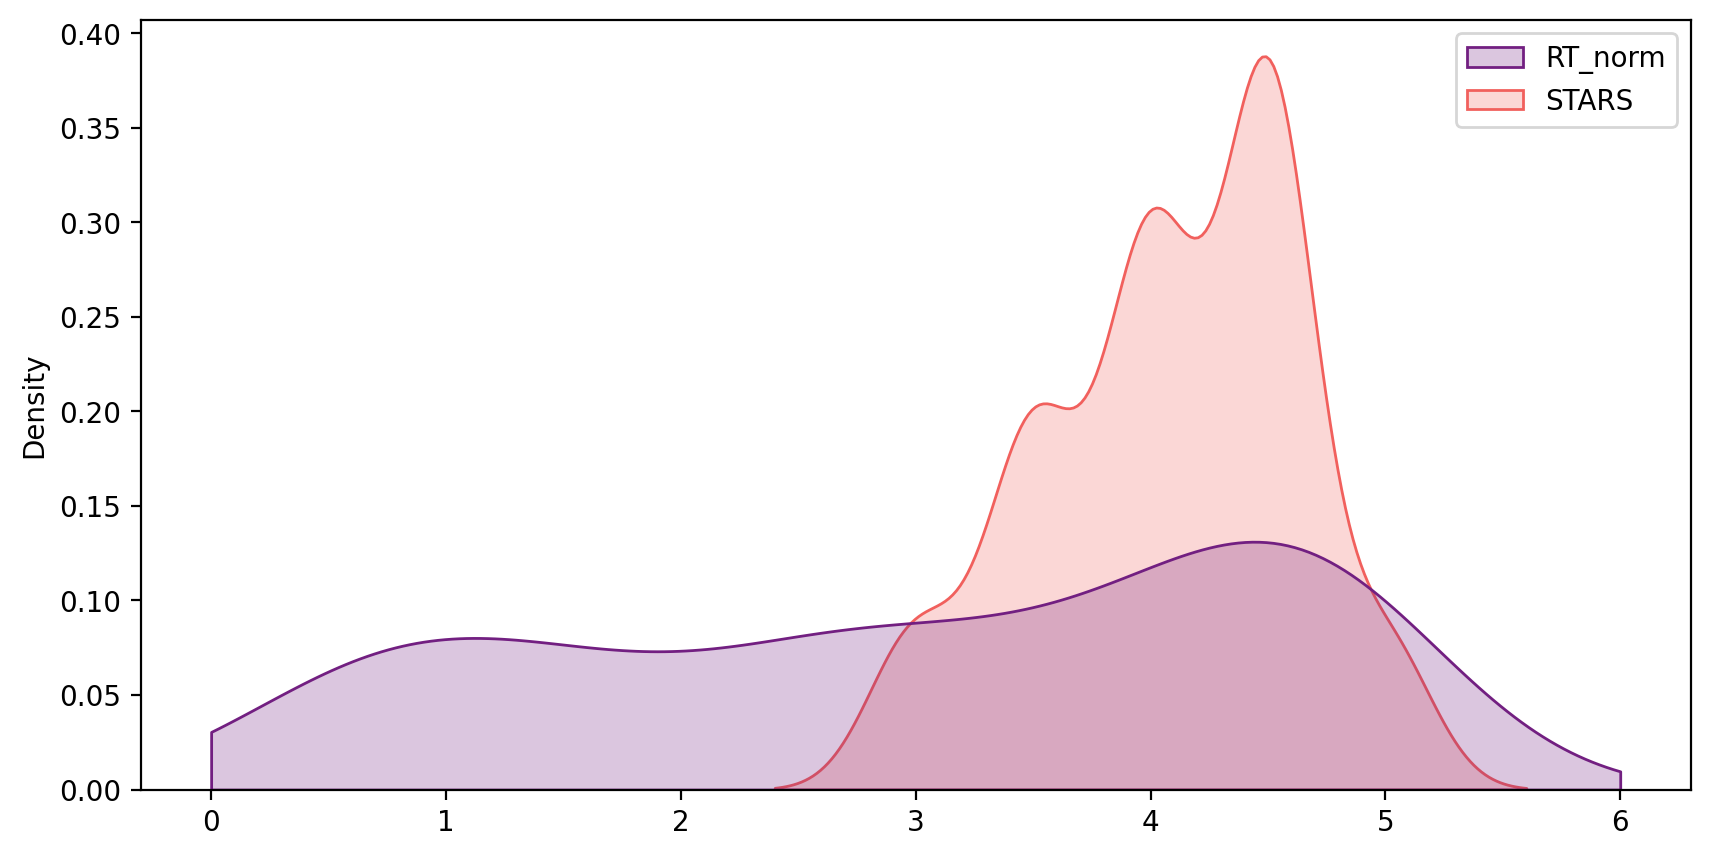

In [50]:
plt.figure(figsize=(10,5),dpi=200)
sns.kdeplot(data=norm_scores[['RT_norm','STARS']],clip=[0,6],shade=True,palette='magma')

### Creating a histplot comparing all the normalized scores.

<Axes: ylabel='Count'>

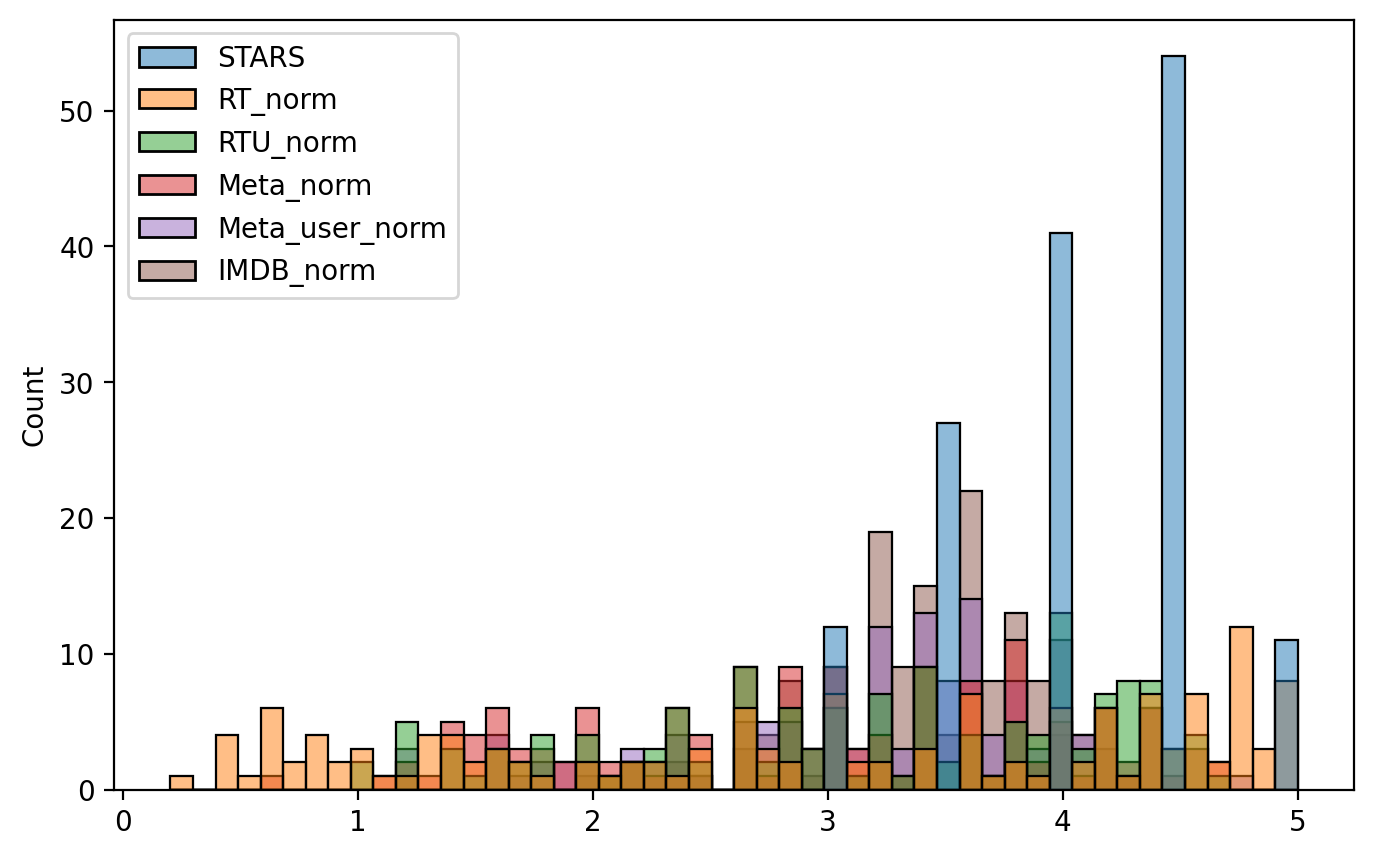

In [51]:
plt.figure(figsize=(8,5),dpi=200)
sns.histplot(data=norm_scores,bins=50)

### How are the worst movies rated across all platforms?

### Creating a clustermap visualization of all normalized scores. Note that differnces in ratings,highly rated movies should be cluster together vs poorly rated movies.Film is dropped as it is not needed.


In [52]:
norm_scores_without_film=norm_scores.drop(columns=['FILM'])

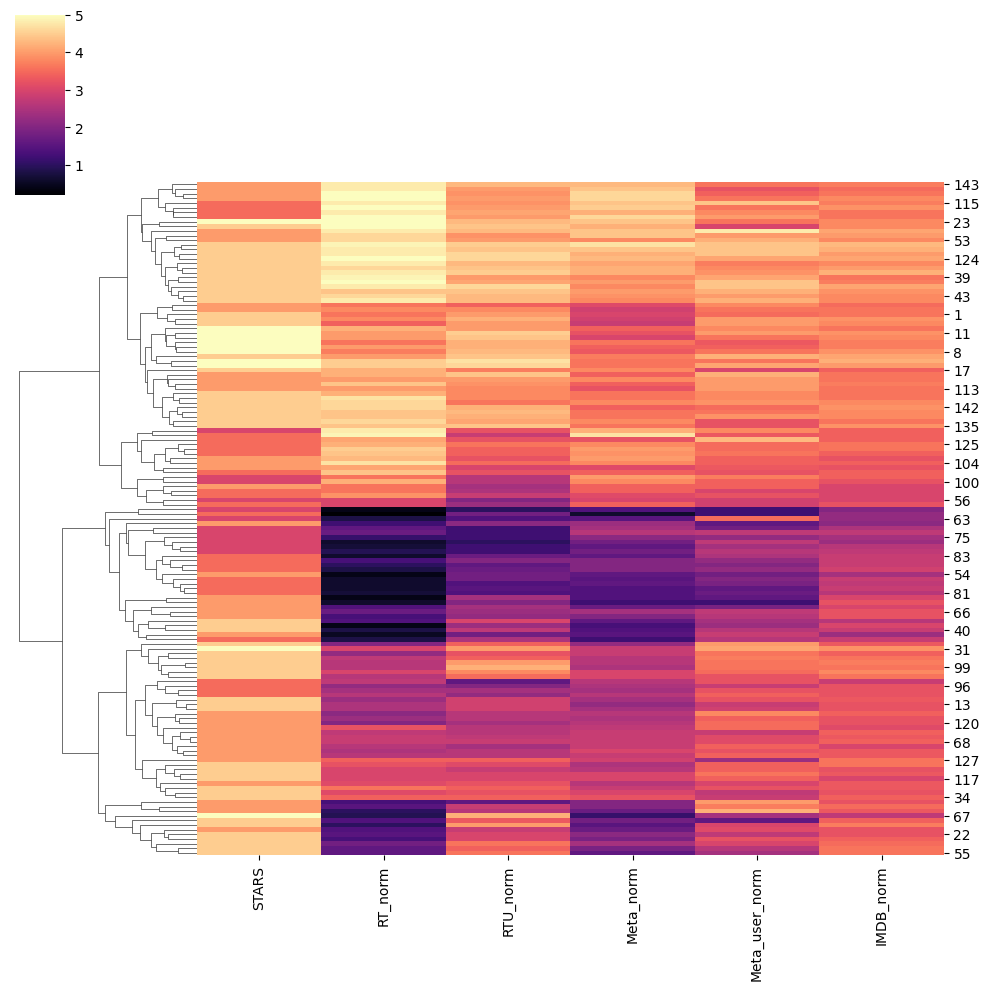

In [53]:
sns.clustermap(norm_scores_without_film,cmap='magma',col_cluster=False)

### Clearly it shows that fandango is rating movies much higher than other sites,considering thatit is then displaying a rounded up version of rating.Let's examine the top 10 worst movies.Based off the Rotten Tomatoes critic ratings,what are the top 10 lowest rated movies? What are the normalized scores for this movies across all platforms?

In [54]:
norm_scores.columns

Index(['FILM', 'STARS', 'RT_norm', 'RTU_norm', 'Meta_norm', 'Meta_user_norm',
       'IMDB_norm'],
      dtype='object')

In [55]:
norm_scores.nsmallest(10,'RT_norm')

,FILM,STARS,RT_norm,RTU_norm,Meta_norm,Meta_user_norm,IMDB_norm
49,Paul Blart: Mall Cop 2 (2015),3.5,0.2,1.8,0.6,1.2,2.2
25,Taken 3 (2015),4.5,0.4,2.3,1.3,2.3,3.0
28,Fantastic Four (2015),3.0,0.4,1.0,1.4,1.2,2.0
54,Hot Pursuit (2015),4.0,0.4,1.8,1.6,1.8,2.4
84,Hitman: Agent 47 (2015),4.0,0.4,2.4,1.4,1.6,3.0
50,The Boy Next Door (2015),4.0,0.5,1.8,1.5,2.8,2.3
77,Seventh Son (2015),3.5,0.6,1.8,1.5,2.0,2.8
78,Mortdecai (2015),3.5,0.6,1.5,1.4,1.6,2.8
83,Sinister 2 (2015),3.5,0.6,1.7,1.6,2.5,2.8
87,Unfinished Business (2015),3.5,0.6,1.4,1.6,1.9,2.7


In [56]:
worst_films=norm_scores.nsmallest(10,'RT_norm')

### Last part is to visualize the distribution of ratings across all sites of 10 worst movies

C:\Users\Shubham-Tejas\AppData\Local\Temp\ipykernel_22272\1675498046.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=worst_films,clip=[0,6],shade=True)


<Axes: ylabel='Density'>

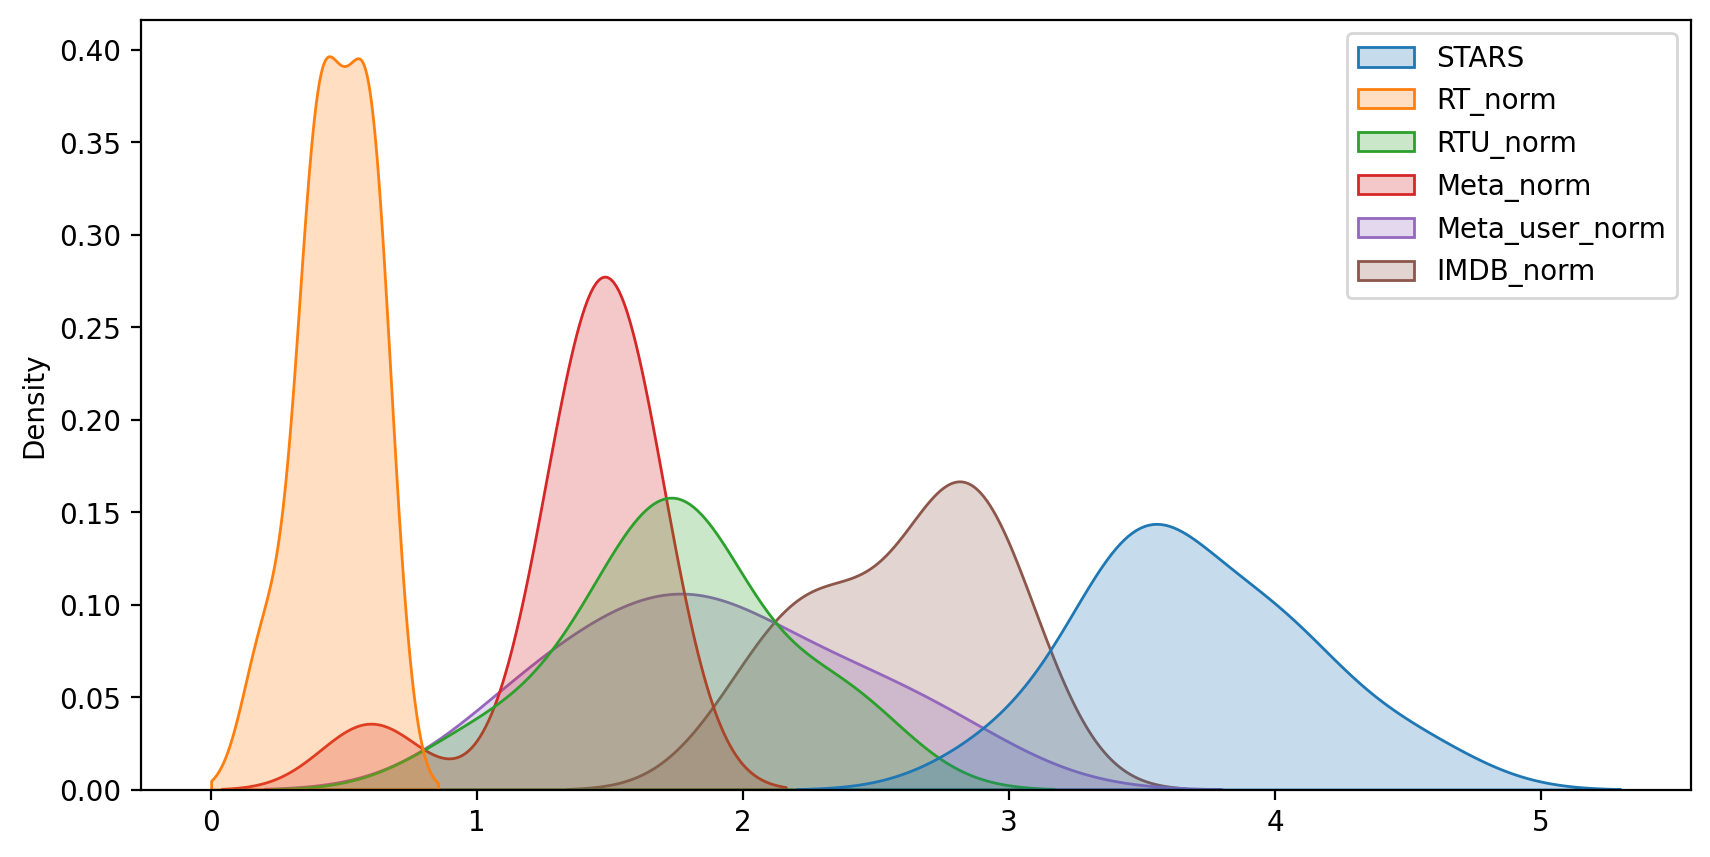

In [57]:
plt.figure(figsize=(10,5),dpi=200)
sns.kdeplot(data=worst_films,clip=[0,6],shade=True)

# Final thoughts: Superb! Fandango is showing  around 3-4 star ratings for films that are worst rated by every other sites. Clearly it is depicting the rating mismatch of fandango sites and how it is making money by selling tickets by showing the wrong ratings.